In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, RocCurveDisplay, ConfusionMatrixDisplay

In [33]:
df=pd.read_csv(r'C:\Users\gayat\Desktop\MTECH 2ND SEM\GAYU PROJECT\brain_stroke.csv')

In [34]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,Male,41.0,0,0,No,Private,Rural,70.15,29.8,formerly smoked,0
4977,Male,40.0,0,0,Yes,Private,Urban,191.15,31.1,smokes,0
4978,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,31.8,smokes,0
4979,Male,40.0,0,0,Yes,Private,Rural,83.94,30.0,smokes,0


In [35]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [36]:
df.shape

(4981, 11)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


In [38]:
df.dropna(inplace=True)



In [39]:
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [40]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['gender']= label_encoder.fit_transform(df['gender'])
 
df['gender'].unique()


array([1, 0])

In [41]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
 
df['ever_married'].unique()

array([1, 0])

In [42]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['work_type']= label_encoder.fit_transform(df['work_type'])
 
df['work_type'].unique()

array([1, 2, 0, 3])

In [43]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
 
df['Residence_type'].unique()

array([1, 0])

In [44]:
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])
 
df['smoking_status'].unique()

array([1, 2, 3, 0])

In [45]:
x=df[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']]

In [46]:
x

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,67.0,0,1,1,1,1,228.69,36.6,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2
2,0,49.0,0,0,1,1,1,171.23,34.4,3
3,0,79.0,1,0,1,2,0,174.12,24.0,2
4,1,81.0,0,0,1,1,1,186.21,29.0,1
...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1
4977,1,40.0,0,0,1,1,1,191.15,31.1,3
4978,0,45.0,1,0,1,0,0,95.02,31.8,3
4979,1,40.0,0,0,1,1,0,83.94,30.0,3


In [47]:
y=df[['stroke']]

In [48]:
y

,stroke
0,1
1,1
2,1
3,1
4,1
...,...
4976,0
4977,0
4978,0
4979,0


In [49]:
#split the dataset
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [50]:
xtrain.shape

(3984, 10)

In [51]:
xtest.shape

(997, 10)

In [52]:
ytrain.shape

(3984, 1)

In [53]:
ytest.shape

(997, 1)

In [54]:
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

# Initialize the DecisionTreeClassifier
dt = DecisionTreeClassifier()

# Train the model
dt.fit(xtrain, ytrain)

# Make predictions
y_pred = dt.predict(xtest)
print(y_pred)

# Calculate accuracy
score = accuracy_score(ytest, y_pred)
print(score)


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [55]:
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Initialize the XGBClassifier
xgb = XGBClassifier(n_estimators=100)

# Train the model
xgb.fit(x, y)

# Make predictions
y_pred = xgb.predict(xtest)
print(y_pred)

# Calculate accuracy
score = accuracy_score(ytest, y_pred)
print(score)


[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [56]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Initialize the KNN classifier with a specified number of neighbors
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(x, y)

# Make predictions
y_pred = knn.predict(xtest)
print(y_pred)


# Calculate accuracy
score = accuracy_score(ytest, y_pred)
print(score)


[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

C:\Users\gayat\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


<Axes: xlabel='stroke'>

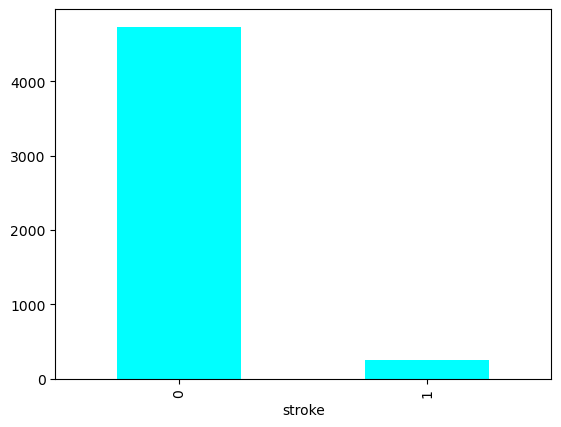

In [57]:
# Graphical representation of the value count distribution of the target attribute
df['stroke'].value_counts().plot(kind="bar",color = "cyan")

<Axes: xlabel='hypertension'>

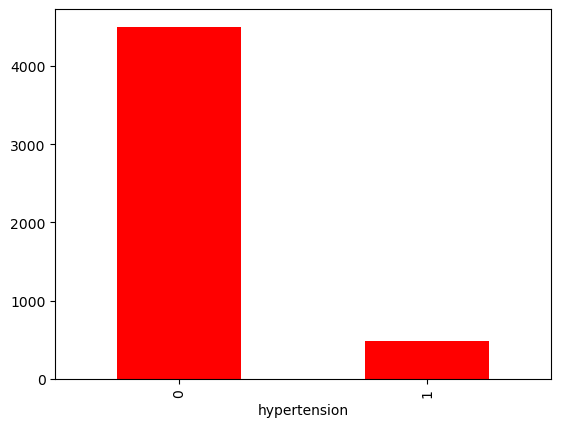

In [58]:
# Graphical representation of the value counts of the hypertension attribute
df['hypertension'].value_counts().plot(kind="bar",color = "red")

<Axes: ylabel='count'>

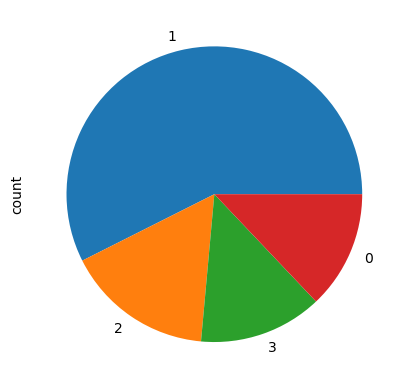

In [59]:
# Graphical representation of the value counts of the work-type attribute
df['work_type'].value_counts().plot(kind="pie")

In [60]:
# Value of count of somoking status attribute
df['smoking_status'].value_counts()

smoking_status
2    1838
0    1500
1     867
3     776
Name: count, dtype: int64

<Axes: ylabel='count'>

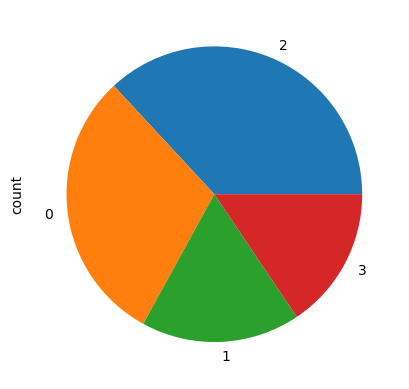

In [61]:
# Graphical representation of the value counts of the smoking staus attribute
df['smoking_status'].value_counts().plot(kind="pie")

In [62]:
# Value of count of residence attribute
df['Residence_type'].value_counts()

Residence_type
1    2532
0    2449
Name: count, dtype: int64

<Axes: ylabel='count'>

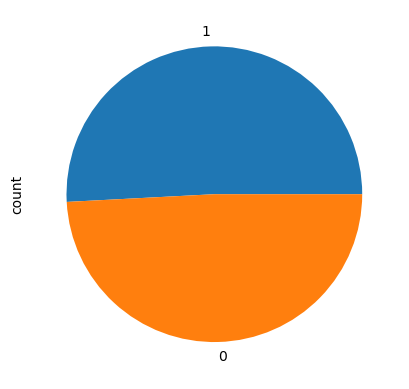

In [63]:
# Graphical representation of the value counts of the residence attribute
df['Residence_type'].value_counts().plot(kind="pie")

In [64]:
# Number of BMI - NULL values
df['bmi'].isnull().sum()

0

<Axes: xlabel='bmi', ylabel='Count'>

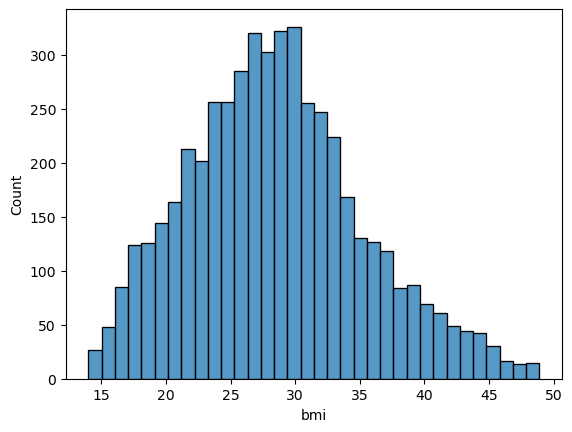

In [65]:
# Graphical representation of bmi attribute
sns.histplot(data=df['bmi'])

<Axes: >

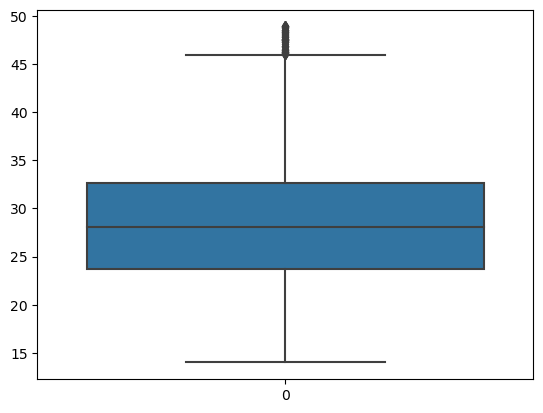

In [66]:
sns.boxplot(data=df['bmi'])

<Axes: xlabel='age', ylabel='Count'>

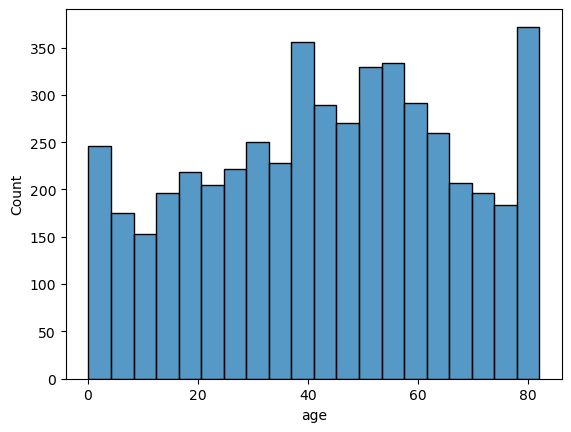

In [67]:
# Graphical representation fo the data in age column
# histogram
sns.histplot(data=df['age'])

<Axes: >

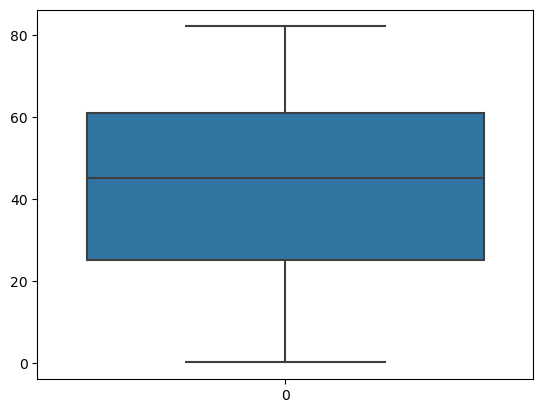

In [68]:
# boxplot
sns.boxplot(data=df['age'])

<Axes: xlabel='avg_glucose_level', ylabel='Count'>

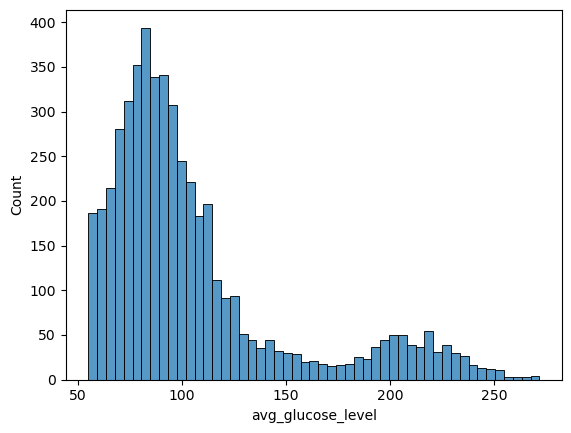

In [69]:
# Graphical representation fo the data in glucose level column
# histogram
sns.histplot(data=df['avg_glucose_level'])

<Axes: >

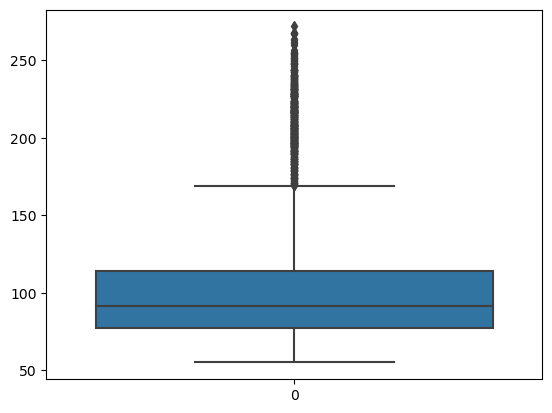

In [70]:
# Boxplot
sns.boxplot(data=df['avg_glucose_level'])

In [71]:
# Value count of heart disease attribute
df['heart_disease'].value_counts()

heart_disease
0    4706
1     275
Name: count, dtype: int64

<Axes: ylabel='count'>

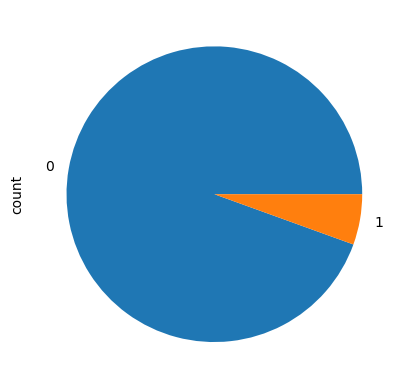

In [72]:
df['heart_disease'].value_counts().plot(kind="pie")

In [73]:
# Value count of evver married attribute
df['ever_married'].value_counts()

ever_married
1    3280
0    1701
Name: count, dtype: int64

<Axes: ylabel='count'>

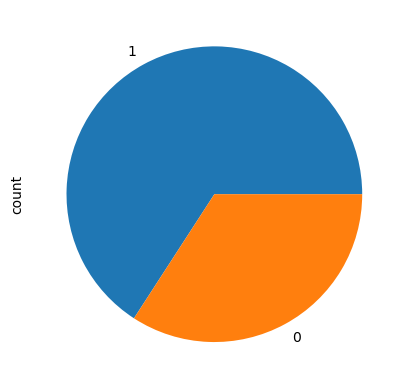

In [74]:
# Graphical representation
df['ever_married'].value_counts().plot(kind="pie")

<Axes: xlabel='stroke', ylabel='count'>

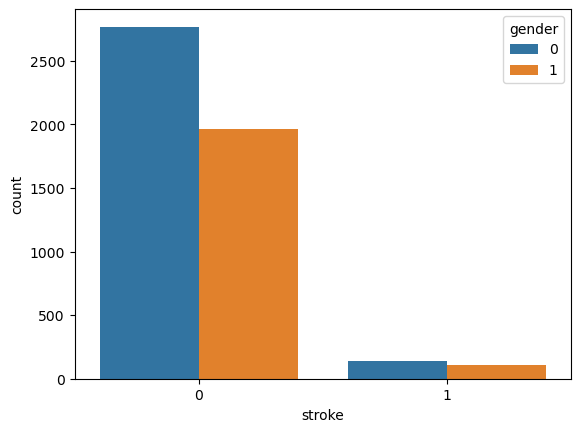

In [75]:
# Comparing stroke with gender
sns.countplot(x='stroke', hue='gender', data=df)

<Axes: xlabel='stroke', ylabel='count'>

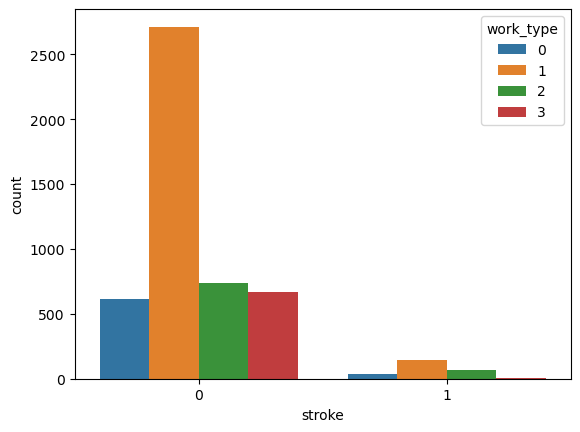

In [76]:
# Comparing stroke with work-type
sns.countplot(x='stroke', hue='work_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

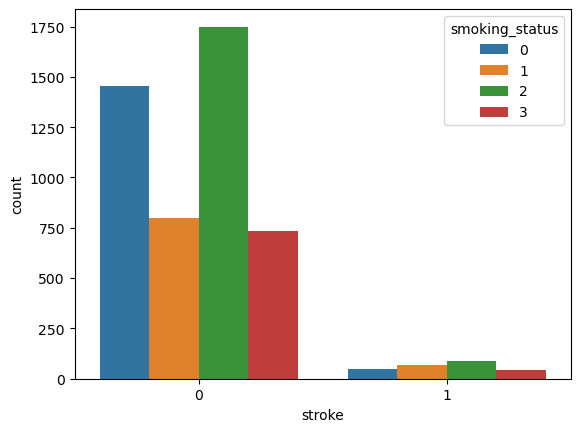

In [77]:
# Comparing stroke with somking_status
sns.countplot(x='stroke', hue='smoking_status', data=df)

<Axes: xlabel='stroke', ylabel='count'>

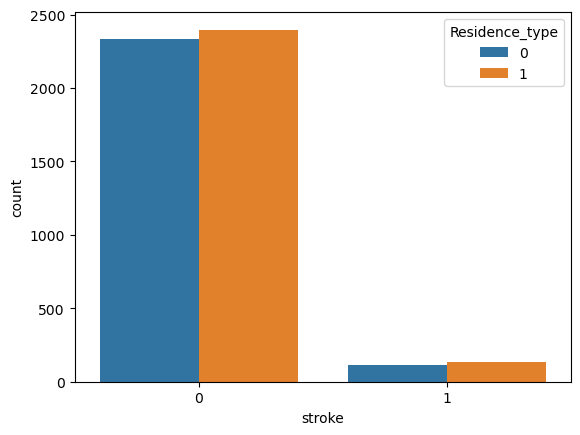

In [78]:
# Comparing stroke with residence type
sns.countplot(x='stroke', hue='Residence_type', data=df)

<Axes: xlabel='stroke', ylabel='count'>

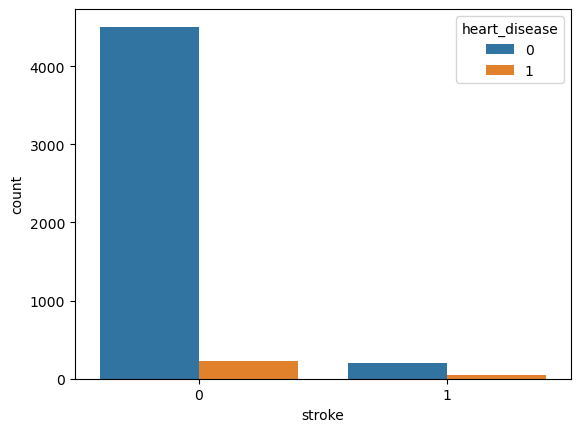

In [79]:
# Comparing stroke with heart disease
sns.countplot(x='stroke', hue='heart_disease', data=df)

<Axes: xlabel='stroke', ylabel='count'>

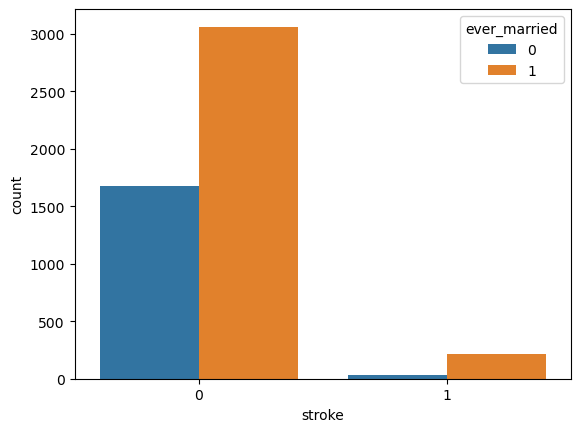

In [80]:
# Comparing stroke with married status
sns.countplot(x='stroke', hue='ever_married', data=df)

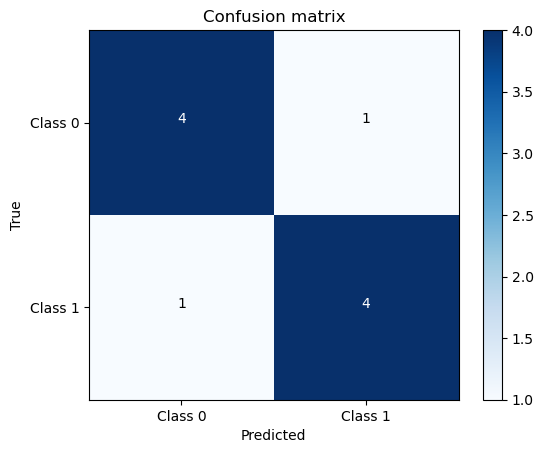

In [81]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Example ground truth and predictions (replace these with your actual data)
y_true = np.array([0, 1, 0, 1, 1, 0, 0, 1, 1, 0])
y_pred = np.array([0, 1, 0, 1, 0, 1, 0, 1, 1, 0])

# Generate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
plt.xlabel('Predicted')
plt.ylabel('True')
plt.xticks(np.arange(2), ['Class 0', 'Class 1'])
plt.yticks(np.arange(2), ['Class 0', 'Class 1'])

# Display values inside the cells
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')

plt.show()


Decision Tree Accuracy: 0.49
KNN Accuracy: 0.505
XGBoost Accuracy: 0.5083333333333333


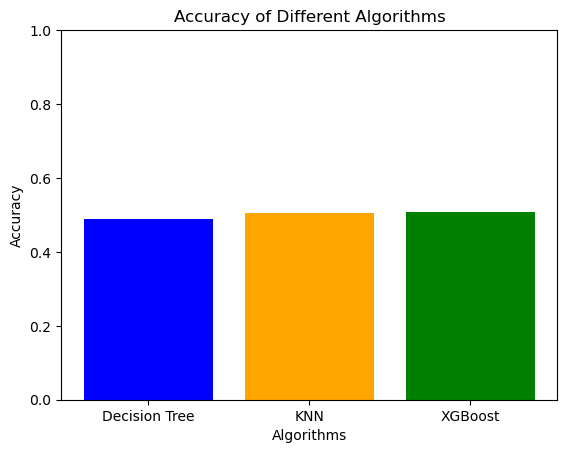

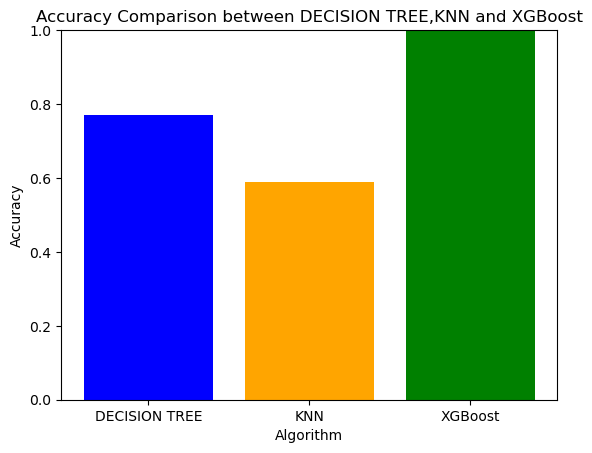

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split

# Assuming you have X and y defined and preprocessed
# For demonstration purposes, let's create some random data
X = np.random.rand(3000, 10)  # 3000 samples, 10 features
y = np.random.randint(0, 2, size=3000)  # Binary labels (0 or 1)

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
clf = DecisionTreeClassifier(max_depth=5)  # You can adjust max_depth to control model complexity
clf.fit(X_train, y_train)
y_pred_dt = clf.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# KNN
k = 3  # Number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

# XGBoost
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Printing the accuracy of each model
print("Decision Tree Accuracy:", accuracy_dt)
print("KNN Accuracy:", accuracy_knn)
print("XGBoost Accuracy:", accuracy_xgb)

# Plotting the accuracy
models = ['Decision Tree', 'KNN', 'XGBoost']
accuracies = [accuracy_dt, accuracy_knn, accuracy_xgb]

plt.bar(models, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Algorithms')
plt.ylim(0.0, 1.0)
plt.show()

# Assuming x and y are your training data and labels
# Assuming xtest and ytest are your test data and labels

# Create and fit the K-nearest neighbors classifier
knn_clf = KNeighborsClassifier(n_neighbors=2)
knn_clf.fit(X, y)

# Predict using the KNN classifier
knn_y_pred = knn_clf.predict(X_test)

# Compute accuracy for KNN
knn_score = accuracy_score(y_test, knn_y_pred)

## Create and fit the Decision tree classifier
dt_clf = DecisionTreeClassifier(max_depth=5) 
dt_clf.fit(X, y)

# Predict using the decision tree classifier
dt_y_pred = dt_clf.predict(X_test)

# Compute accuracy for decision tree
dt_score = accuracy_score(y_test, dt_y_pred)

# Create and fit the XGBoost classifier
xgb_clf = XGBClassifier()
xgb_clf.fit(X, y)

# Predict using the XGBoost classifier
xgb_y_pred = xgb_clf.predict(X_test)

# Compute accuracy for XGBoost
xgb_score = accuracy_score(y_test, xgb_y_pred)

# Plotting
labels = ['DECISION TREE','KNN','XGBoost']
scores = [knn_score,dt_score,xgb_score]

plt.bar(labels, scores, color=['blue','orange','green'])
plt.xlabel('Algorithm')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison between DECISION TREE,KNN and XGBoost')
plt.ylim(0, 1)  # Setting y-axis limit between 0 and 1
plt.show()


Shape of X: (3000, 10)
Shape of y: (3000,)
Shape of X_train: (2400, 10)
Shape of X_test: (600, 10)
Shape of y_train: (2400,)
Shape of y_test: (600,)


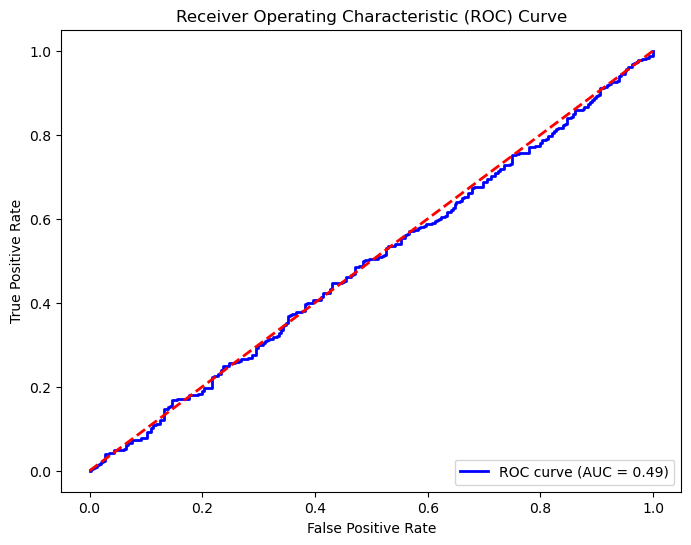

In [83]:
import numpy as np  # Importing numpy for generating random data
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Generating random data for demonstration
X = np.random.rand(3000, 10)  # 3000 samples, 10 features
y = np.random.randint(0, 2, size=3000)  # Binary labels (0 or 1)

# Verify the shapes of X and y
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes after splitting
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

# Create the classifier object
xgb = XGBClassifier()

# Training the classifier
xgb.fit(X_train, y_train)

# Predicting on the test dataset
y_pred_prob = xgb.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calculate the AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [84]:
prediction=xgb.predict([[12345,49.0,0,0,1,2,1,171.23,34.4,3]])
print(prediction)

[0]


In [85]:
prediction=clf.predict([[4467,44.0,0,0,1,0,1,85.28,26.2,0]])
print(prediction)

[1]


In [86]:
import pickle

In [87]:
# Save the model to a file
filename = r'C:\Users\gayat\Desktop\GAYU PROJECT\project final\stroke.pkl'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

In [88]:
import os
import pickle
if os.path.isfile(r"model.pkl"):
    print("File Exists")
else:
    pickle.dump(clf,open(r'C:\Users\gayat\Desktop\GAYU PROJECT\project final\stroke.pkl','wb'))
    print("Model Loaded!")

Model Loaded!
